# HW4 sample answer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1. Pick a US city other than Atlanta. Write a MATLAB or Python script to read the historic temperature data of all months. If there is a missing value use NaN (or np.nan for python). 

In [2]:
df=pd.read_excel('ATL_MonMeanTemp_1879_2020.xls',skiprows=1)
data=df.to_numpy()
# enter fake missing data
data[20,1:]=np.nan

### 2. Regress monthly temperatures onto time (year) and record the regression coefficient and intercept (a and b in y=ax+b) for each month. 

Briefly discuss your result (Do you notice differences in regression coefficient "a" over 12 months?) Remove NaN from the data before you perform the calculation (hint: use logical variable such as index = ~np.isnan(temp) and for loop to calculate over all 12 months). 

In [3]:
N=12
a=np.zeros(N)
b=np.zeros(N)
r2=np.zeros(N)
for n in np.arange(0,N,1):
    x = data[:,0]
    y = data[:,n+1]
    nonan=(~np.isnan(y))
    c=np.cov(x[nonan],y[nonan])
    a[n]=c[0,1]/c[0,0]
    b[n]=np.mean(y[nonan])-a[n]*np.mean(x[nonan])
    r2[n]=c[0,1]**2/c[0,0]/c[1,1]

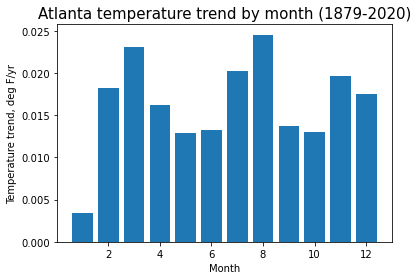

In [4]:
plt.bar(np.arange(1,13,1),a)
plt.xlabel('Month')
plt.ylabel('Temperature trend, deg F/yr')
plt.title('Atlanta temperature trend by month (1879-2020)',fontsize=15)
plt.show()

### There is no clear seasonal differences in the temperature trend. Its magnitude varies from less than 0.5 degF/century to more than 2.0 degF/century

### 3. Calculate the coefficient of determination (R2) for each month. Briefly discuss your result (how well does the linear regression approximate the original data?)

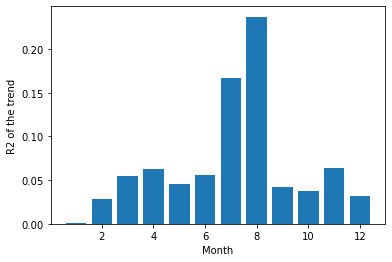

In [5]:
plt.bar(np.arange(1,13,1),r2)
plt.xlabel('Month')
plt.ylabel('R2 of the trend')
plt.show()

### R2 value is larger in the two summer months (July and August) exceeding 0.15. Otherwise, it remains low, approximately about at 0.05 or less. 

### 4. Repeat (2) and (3) for the period of 1990 to 2020. Briefly discuss your results. (Are the regression coefficient different over this period?)



In [6]:
a=np.zeros(N)
b=np.zeros(N)
r2=np.zeros(N)
for n in np.arange(0,N,1):
    x = data[:,0]
    y = data[:,n+1]
    nonan=(~np.isnan(y)) & (x >= 1990)
    c=np.cov(x[nonan],y[nonan])
    a[n]=c[0,1]/c[0,0]
    b[n]=np.mean(y[nonan])-a[n]*np.mean(x[nonan])
    r2[n]=c[0,1]**2/c[0,0]/c[1,1]

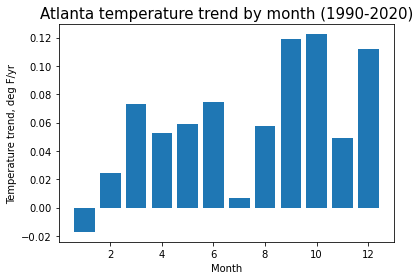

In [7]:
plt.bar(np.arange(1,13,1),a)
plt.xlabel('Month')
plt.ylabel('Temperature trend, deg F/yr')
plt.title('Atlanta temperature trend by month (1990-2020)',fontsize=15)
plt.show()

### In the last 30 years, the magnitude of the trend has gotten larger for most of the time, but significant variability still exists between different months. The strongest trend occurred in the fall and winter. Also the trend in the month of July is particularly low. I will investigate this later. 

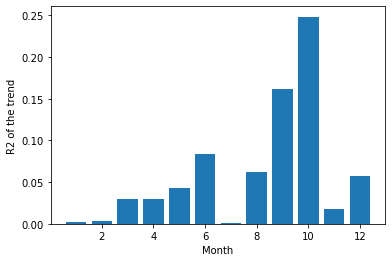

In [8]:
plt.bar(np.arange(1,13,1),r2)
plt.xlabel('Month')
plt.ylabel('R2 of the trend')
plt.show()

### In the last 30 years, the largest R2 value shifted to the fall months of September and October. These two months had the strongest temperature trend as well. 

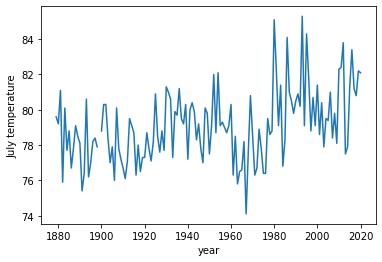

In [12]:
plt.plot(x,data[:,7])
plt.ylabel('July temperature')
plt.xlabel('year')
plt.show()

### There is a peak in early 1990s that are even warmer than late 2010s. This likely caused the endpoint effect, causing almost no temperature trend after 1990s. 